In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces =  fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /content/scikit_learn_data


In [0]:
from sklearn.model_selection import train_test_split
X_train0 ,X_test0 , y_train0, y_test0 = train_test_split(faces.images, faces.target ,test_size=0.4, random_state=0)


In [0]:
import numpy as np
X_train = X_train0[:, :, :, np.newaxis]
X_test = X_test0[:,:,:,np.newaxis]


In [0]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0 , 40)

In [13]:
X_train.shape, Y_train.shape

((240, 64, 64, 1), (240, 40))

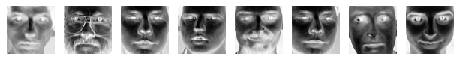

In [14]:
import matplotlib.pyplot as plt
for i in range(8) :
    plt.subplot(1,8, i+1)
    plt.imshow(X_train[i, :,:,0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_generator = ImageDataGenerator(
                                        rotation_range =10 , 
                                        width_shift_range= 0.1, 
            height_shift_range=0.1, 
            horizontal_flip= True)

In [0]:
train_generator.fit(X_train)

In [0]:
batch_size =8 
iterator = train_generator.flow(X_train[:batch_size] , Y_train[:batch_size], batch_size= batch_size )

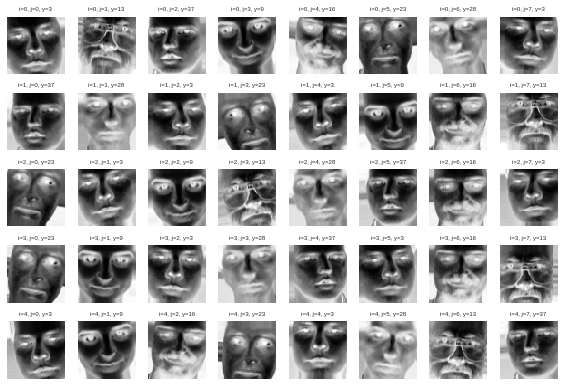

In [23]:
for i in range(int(40/ batch_size)) :
    x_augs , y_augs = iterator.next()
    for j in range(batch_size) :
        plt.subplot(5,8, batch_size*i +j +1)
        plt.imshow(x_augs[j,:,:,0])
        plt.title("i={}, j={}, y={}".format(i , j, np.argmax(y_augs[j, :])), fontsize= 6)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

In [0]:
test_generator = ImageDataGenerator()

train_iterator = train_generator.flow(X_train, Y_train , batch_size=len(X_train ))

N= 50
X_train_new = []
Y_train_new = []
for i in range(N) :
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)


In [30]:
print(np.shape(X_train_new))
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

X_train_new.shape

(50, 240, 64, 64, 1)


(12000, 64, 64, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D, Flatten, Dense , Dropout
from keras.optimizers import Adadelta, SGD
from keras.regularizers import l2

np.random.seed(0)

In [0]:
model = Sequential()

model.add(Conv2D(20, (4,4), activation="relu", input_shape = (64, 64, 1) ,padding ="same", kernel_initializer ="glorot_uniform"))
model.add(MaxPooling2D() )
model.add(Dropout(0.4))
model.add(Conv2D(50, (4,4), activation ="relu" , padding="same", kernel_initializer ="glorot_uniform" ))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation="tanh", kernel_initializer ="glorot_uniform"))
model.add(Dense(40, activation ="softmax", kernel_initializer ="glorot_uniform"))
model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer =RMSprop())


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
__________

In [46]:
import time
start =time.time()
hist1= model.fit(X_train, Y_train, epochs=20, batch_size = 20, validation_data = (X_test, Y_test) , verbose =2)
print("total time ", time.time()-start)

Train on 240 samples, validate on 160 samples
Epoch 1/20
 - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.3643 - val_acc: 0.9000
Epoch 2/20
 - 0s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.3387 - val_acc: 0.9125
Epoch 3/20
 - 0s - loss: 0.0495 - acc: 1.0000 - val_loss: 0.3131 - val_acc: 0.9187
Epoch 4/20
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3080 - val_acc: 0.9062
Epoch 5/20
 - 0s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.3462 - val_acc: 0.9000
Epoch 6/20
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.3107 - val_acc: 0.9062
Epoch 7/20
 - 0s - loss: 0.2032 - acc: 0.9542 - val_loss: 0.3858 - val_acc: 0.8687
Epoch 8/20
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.3190 - val_acc: 0.9063
Epoch 9/20
 - 0s - loss: 0.0035 - acc: 1.0000 - val_loss: 0.2965 - val_acc: 0.9125
Epoch 10/20
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.2964 - val_acc: 0.9000
Epoch 11/20
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.2753 - val_acc: 0.9250
Epoch 12/20
 - 0s - loss: 0.0017 - acc:

In [47]:
start =time.time()
hist2 = model.fit(X_train_new, Y_train_new, epochs=20, batch_size=20, validation_data=(X_test, Y_test), verbose=2)
print("total time ", time.time()-start)

Train on 12000 samples, validate on 160 samples
Epoch 1/20
 - 9s - loss: 0.6258 - acc: 0.8414 - val_loss: 0.1844 - val_acc: 0.9437
Epoch 2/20
 - 9s - loss: 0.0924 - acc: 0.9825 - val_loss: 0.1783 - val_acc: 0.9500
Epoch 3/20
 - 8s - loss: 0.0372 - acc: 0.9931 - val_loss: 0.1364 - val_acc: 0.9625
Epoch 4/20
 - 8s - loss: 0.0182 - acc: 0.9960 - val_loss: 0.1094 - val_acc: 0.9687
Epoch 5/20
 - 9s - loss: 0.0111 - acc: 0.9973 - val_loss: 0.1144 - val_acc: 0.9562
Epoch 6/20
 - 9s - loss: 0.0071 - acc: 0.9982 - val_loss: 0.0954 - val_acc: 0.9687
Epoch 7/20
 - 9s - loss: 0.0054 - acc: 0.9990 - val_loss: 0.1145 - val_acc: 0.9687
Epoch 8/20
 - 8s - loss: 0.0050 - acc: 0.9986 - val_loss: 0.1175 - val_acc: 0.9687
Epoch 9/20
 - 9s - loss: 0.0049 - acc: 0.9983 - val_loss: 0.1261 - val_acc: 0.9687
Epoch 10/20
 - 9s - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0873 - val_acc: 0.9750
Epoch 11/20
 - 9s - loss: 0.0026 - acc: 0.9993 - val_loss: 0.1285 - val_acc: 0.9750
Epoch 12/20
 - 9s - loss: 0.0018 - ac

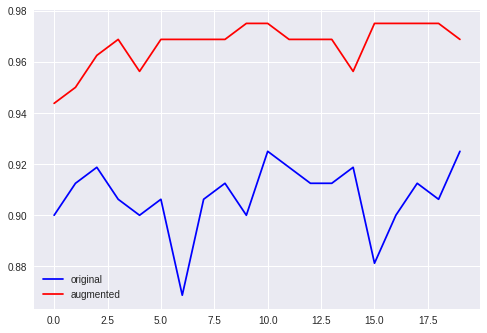

In [49]:
plt.plot(hist1.history["val_acc"], "b", label ="original")
plt.plot(hist2.history["val_acc"], "r", label ="augmented")
plt.ylim=(0, 1.02)
plt.legend()
plt.show()